In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


# imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

# read data and discover it 

in this data it will case error encode utf-8 so from solutions
is chardet library or
but r before file path 
or specify encode="type of encoding "

In [3]:
! pip install chardet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 3.2 MB/s eta 0:00:00


In [4]:
import chardet 
with open("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv","rb") as f :
    result=chardet.detect(f.read())

In [5]:
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [6]:
df=pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv",encoding=result['encoding'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
print(f"number of observations {df.shape[0]} and number of features {df.shape[1]}")

number of observations 9994 and number of features 21


In [8]:
print(f"the sum of missing values in our df is {df.isnull().sum().sum()}")

the sum of missing values in our df is 0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [10]:
df.describe(include="object").T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Order Date,9994,1237,9/5/2016,38
Ship Date,9994,1334,12/16/2015,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


# now lets preprocessing our data 

In [11]:
# city 
df_country=df[["Segment","Country","City",'Profit']]
df_city=df_country.groupby('City')['Profit'].mean()

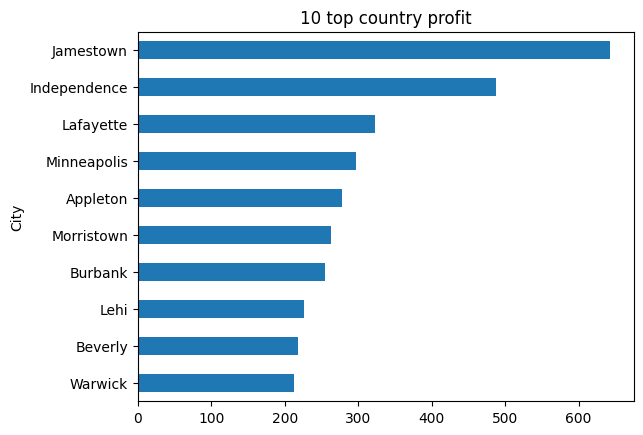

In [12]:
df_city.sort_values().tail(10).plot(kind="barh",title="10 top country profit");

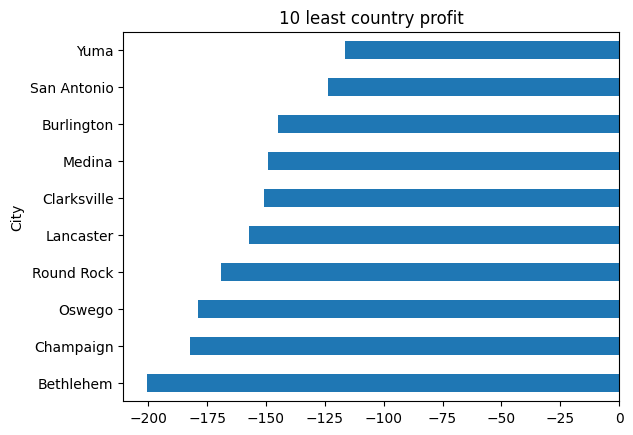

In [13]:
df_city.sort_values().head(10).plot(kind="barh",title="10 least country profit");

In [14]:
def plot_(feature_togroupby,feat2):
        df.groupby(feature_togroupby)[feat2].mean().plot(kind="bar",title=f"{feature_togroupby} vs {feat2}")
        plt.xlabel(feature_togroupby)
        plt.ylabel(feat2);

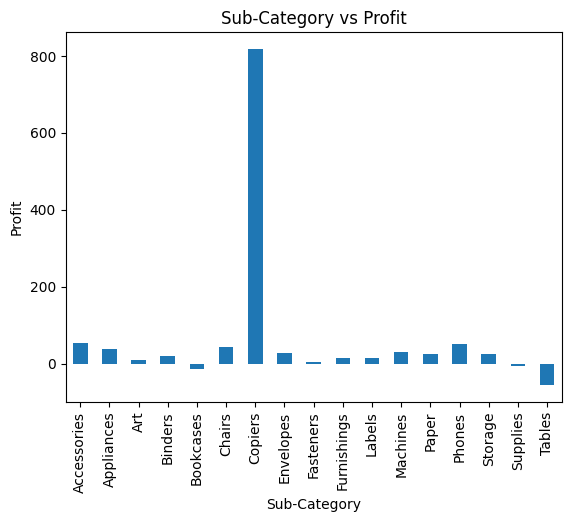

In [15]:
plot_('Sub-Category','Profit')

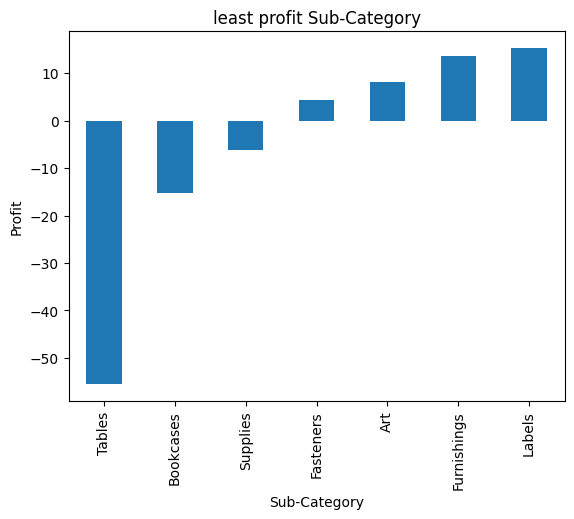

In [16]:
df.groupby('Sub-Category')['Profit'].mean().sort_values().head(7).plot(kind="bar",title="least profit Sub-Category")
plt.xlabel('Sub-Category')
plt.ylabel("Profit");

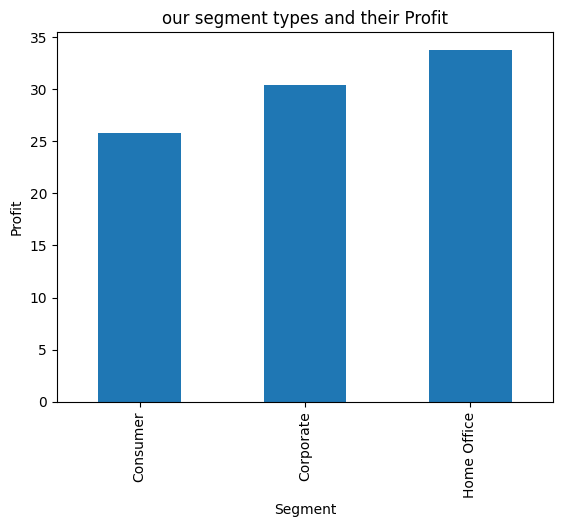

In [17]:
df.groupby('Segment')['Profit'].mean().sort_values().plot(kind="bar",title="our segment types and their Profit")
plt.xlabel("Segment")
plt.ylabel("Profit");

In [18]:
# lets drop columns which didnt provide us with any information
# as you see country didnt provide us with any info has low cardinalty  and postal code and product have high cardinalty
df.columns
df.drop(columns=['Row ID', 'Order ID','Customer ID', 'Customer Name','Postal Code','Product ID',"Country"],inplace=True)

In [19]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


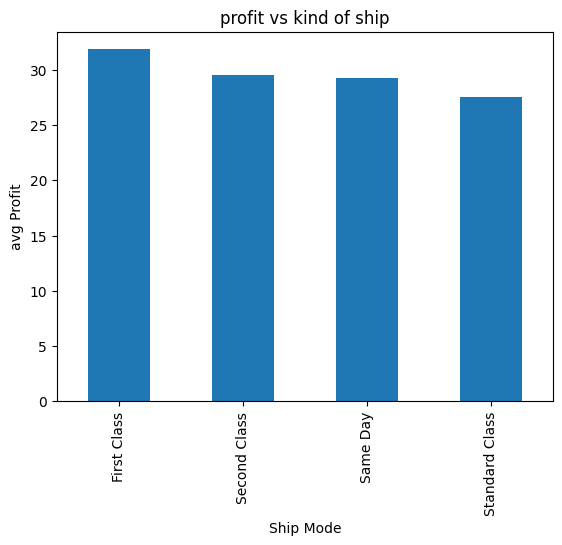

In [20]:
# lets see of kind of ship effecting our profit 
ship_type_profit=df[["Ship Mode","Profit"]]
ship_type_profit.groupby('Ship Mode')['Profit'].mean().sort_values(ascending=False).plot(kind="bar",title="profit vs kind of ship")
plt.xlabel("Ship Mode")
plt.ylabel("avg Profit");

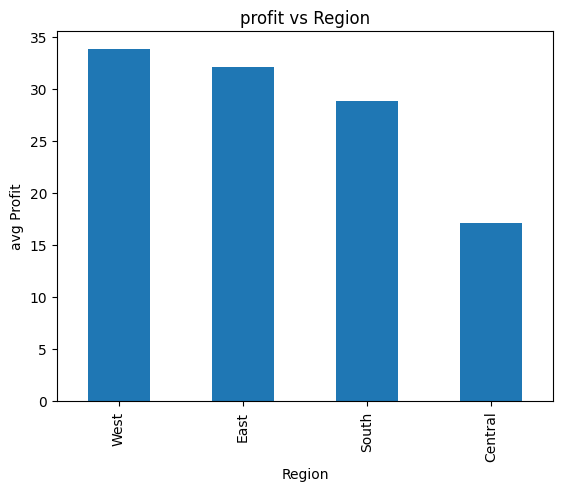

In [21]:
df.groupby('Region')['Profit'].mean().sort_values(ascending=False).plot(kind="bar",title="profit vs Region")
plt.xlabel("Region")
plt.ylabel("avg Profit");

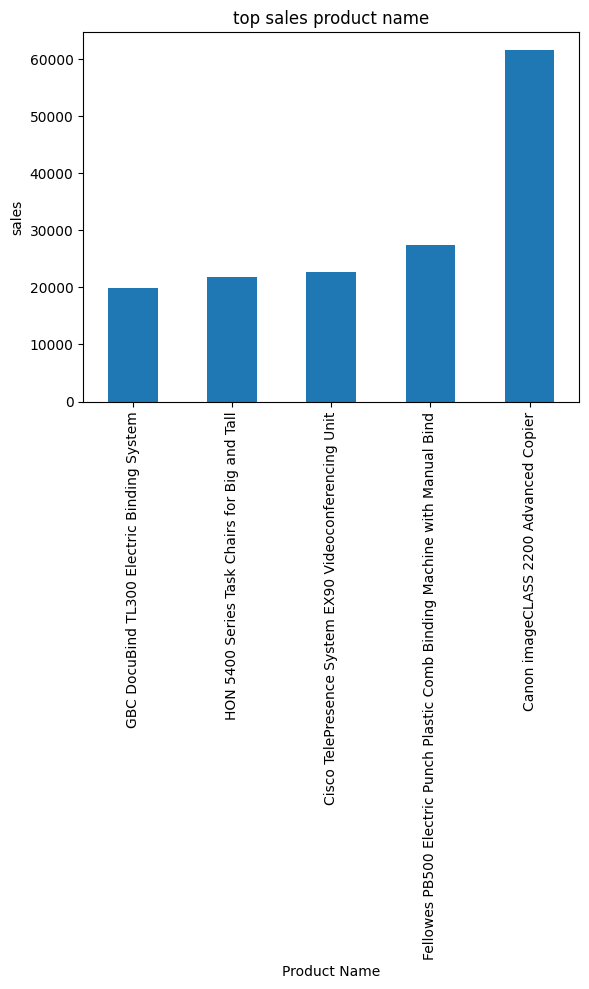

In [22]:
product_info=df[['Product Name','Sales',"Profit"]]
product_info.groupby('Product Name')['Sales'].sum().sort_values().tail().plot(kind="bar",title="top sales product name")
plt.xlabel("Product Name")
plt.ylabel("sales");

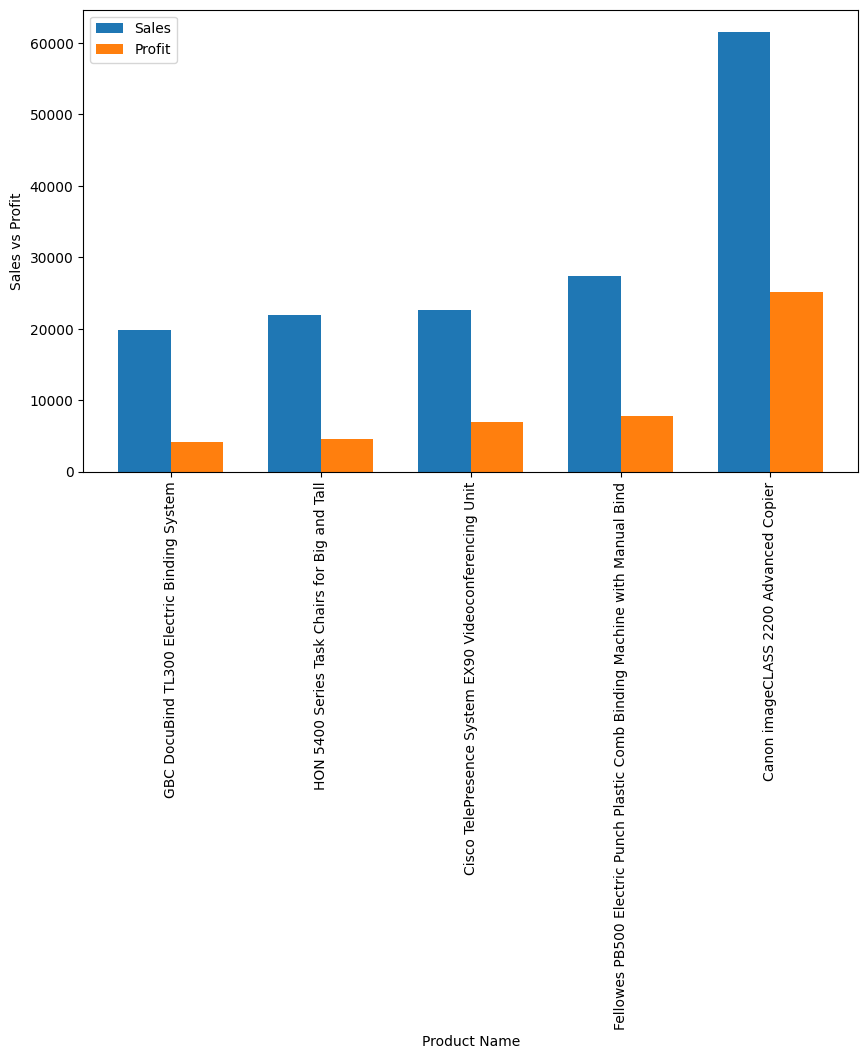

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
product_info = df[['Product Name', 'Sales', 'Profit']]
sales = product_info.groupby('Product Name')['Sales'].sum().sort_values().tail()
profit = product_info.groupby('Product Name')['Profit'].sum().sort_values().tail()
bar_width = 0.35
index = range(len(sales))
ax.bar(index, sales, bar_width, label='Sales')
ax.bar([i + bar_width for i in index], profit, bar_width, label='Profit')
plt.xlabel('Product Name')
plt.ylabel('Sales vs Profit')
plt.xticks([i + bar_width / 2 for i in index], sales.index, rotation=90)
plt.legend()

plt.show()



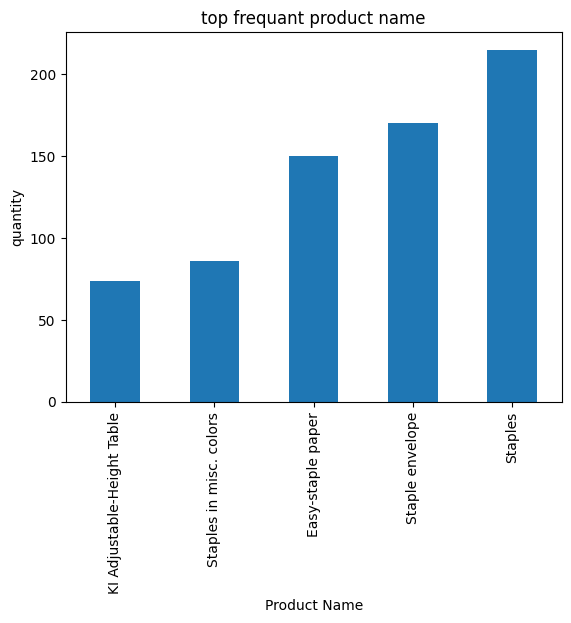

In [24]:
product_info=df[['Product Name',"Quantity"]]
product_info.groupby('Product Name')['Quantity'].sum().sort_values().tail().plot(kind="bar",title="top frequant product name")
plt.xlabel("Product Name")
plt.ylabel("quantity");

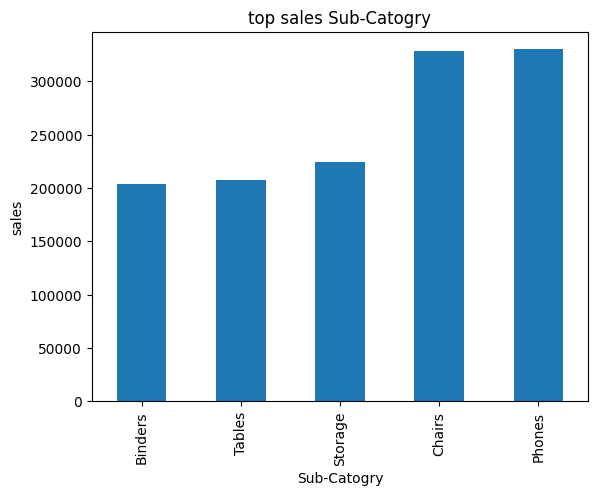

In [25]:
product_info=df[['Sub-Category',"Sales"]]
product_info.groupby('Sub-Category')['Sales'].sum().sort_values().tail().plot(kind="bar",title="top sales Sub-Catogry")
plt.xlabel("Sub-Catogry")
plt.ylabel("sales");

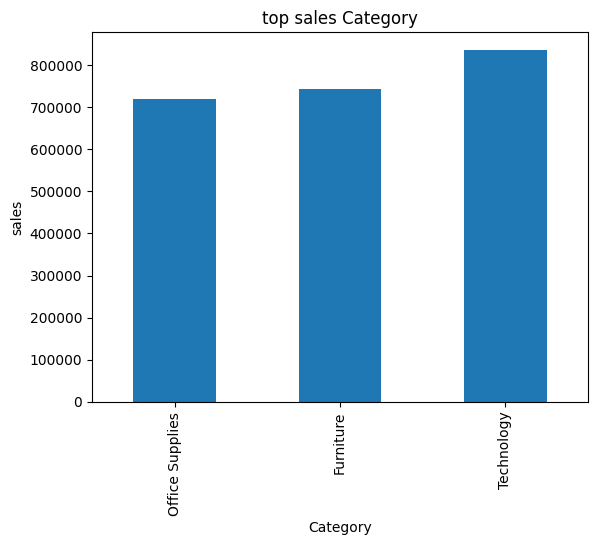

In [26]:
product_info=df[['Category',"Sales"]]
product_info.groupby('Category')['Sales'].sum().sort_values().tail().plot(kind="bar",title="top sales Category")
plt.xlabel("Category")
plt.ylabel("sales");

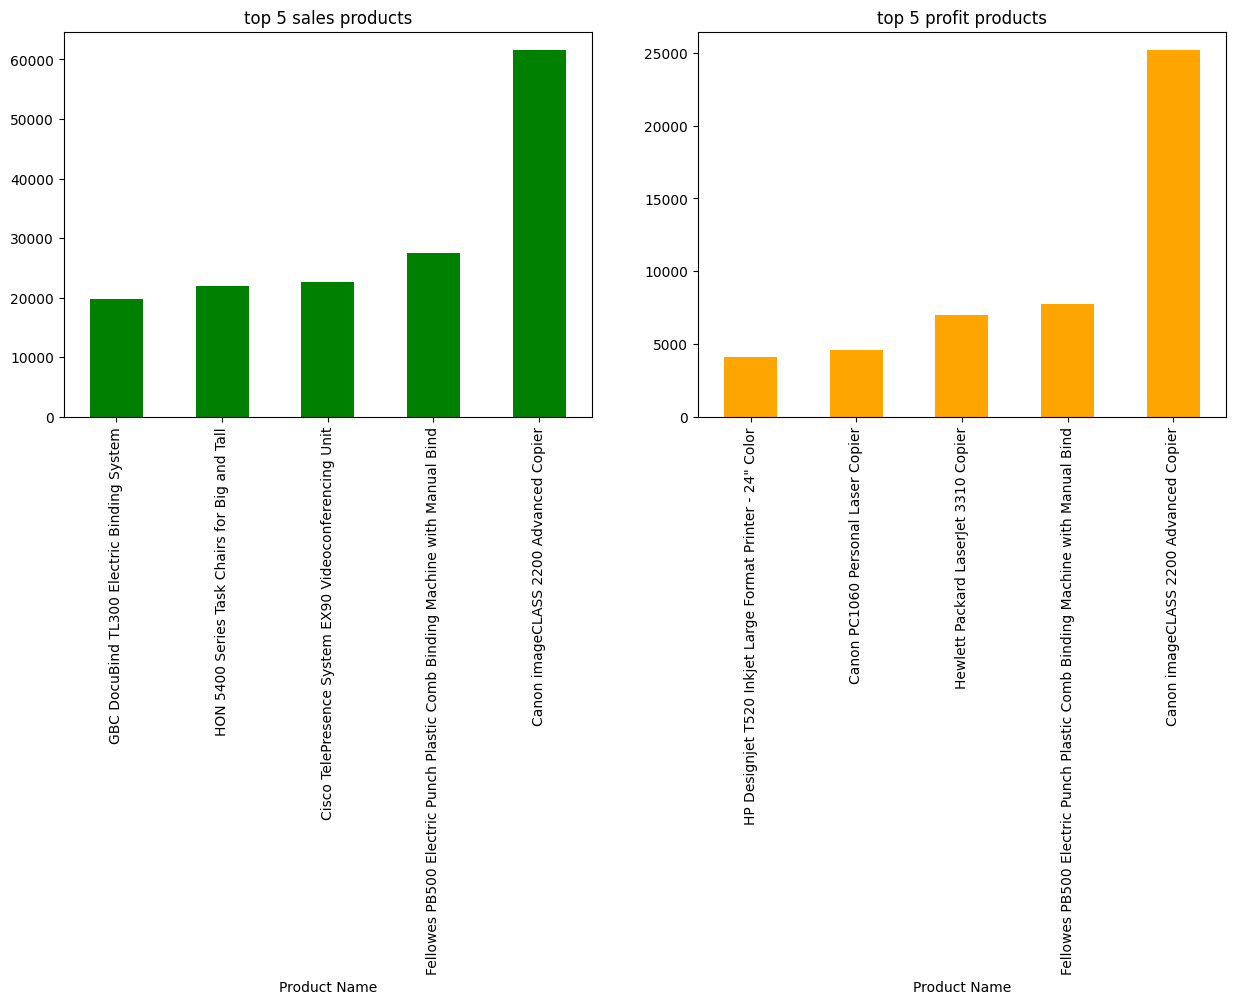

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
product_info=df[['Product Name','Sales',"Profit"]]
sales_info=product_info.groupby('Product Name')['Sales'].sum().sort_values().tail().plot(kind="bar",ax=ax1,color="green")
profit_info=product_info.groupby('Product Name')['Profit'].sum().sort_values().tail().plot(kind="bar",ax=ax2,color="orange")
ax1.set_title("top 5 sales products")
ax2.set_title("top 5 profit products")
plt.show();


In [28]:
# see how many product have both high sales and profit
product_info.groupby('Product Name')['Sales'].sum().sort_values().tail().index==product_info.groupby('Product Name')['Profit'].sum().sort_values().tail().index
print(f"the % of products that have both high sales and profits {round((2/5)*100)}%")

the % of products that have both high sales and profits 40%


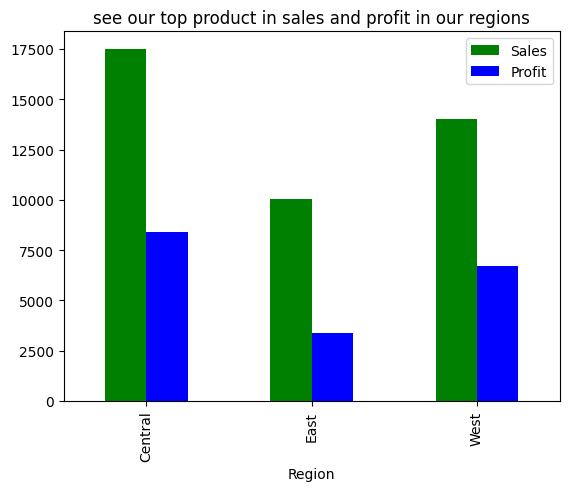

In [29]:
# now we will focuse on high product in sales and profit which is "Canon imageCLASS 2200 Advanced Copier"
product=df[df["Product Name"]=="Canon imageCLASS 2200 Advanced Copier"]
product_region=product.groupby(['Region'])
product_region=product_region[['Sales','Profit']].mean()
product_region.plot(kind="bar",color=['green','blue'])
plt.title("see our top product in sales and profit in our regions")
plt.show();

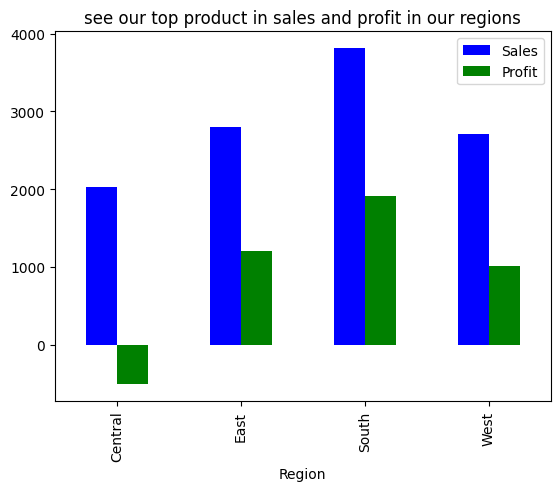

In [30]:
# now we will focuse on high product in sales and profit which is "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"
product=df[df["Product Name"]=="Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]
product_region=product.groupby(['Region'])
product_region=product_region[['Sales','Profit']].mean()
product_region.plot(kind="bar",color=['blue','green'])
plt.title("see our top product in sales and profit in our regions")
plt.show();

In [31]:
# as you see we have loss in central region for "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"
# we must see what cause that loss
mask=(df['Product Name']=="Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind")&(df['Region']=="Central")
cause_of_loss_central=df[mask]
cause_of_loss_central

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,9/10/2017,9/15/2017,Standard Class,Home Office,Chicago,Illinois,Central,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,11/19/2017,11/21/2017,First Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,4/28/2015,5/1/2015,First Class,Home Office,Midland,Michigan,Central,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


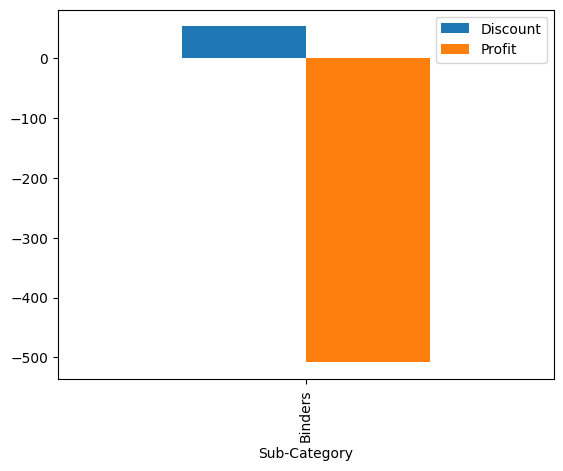

In [32]:
# lets see factors for loss
cause_of_loss_central=cause_of_loss_central.groupby('Sub-Category')
cause_of_loss_central=cause_of_loss_central[["Discount","Profit"]].mean()
cause_of_loss_central['Discount']=cause_of_loss_central['Discount']*100
cause_of_loss_central.plot(kind="bar");

In [33]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


/tmp/ipykernel_18/3480287561.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  montly_sales=montly_sales.resample("M").sum()


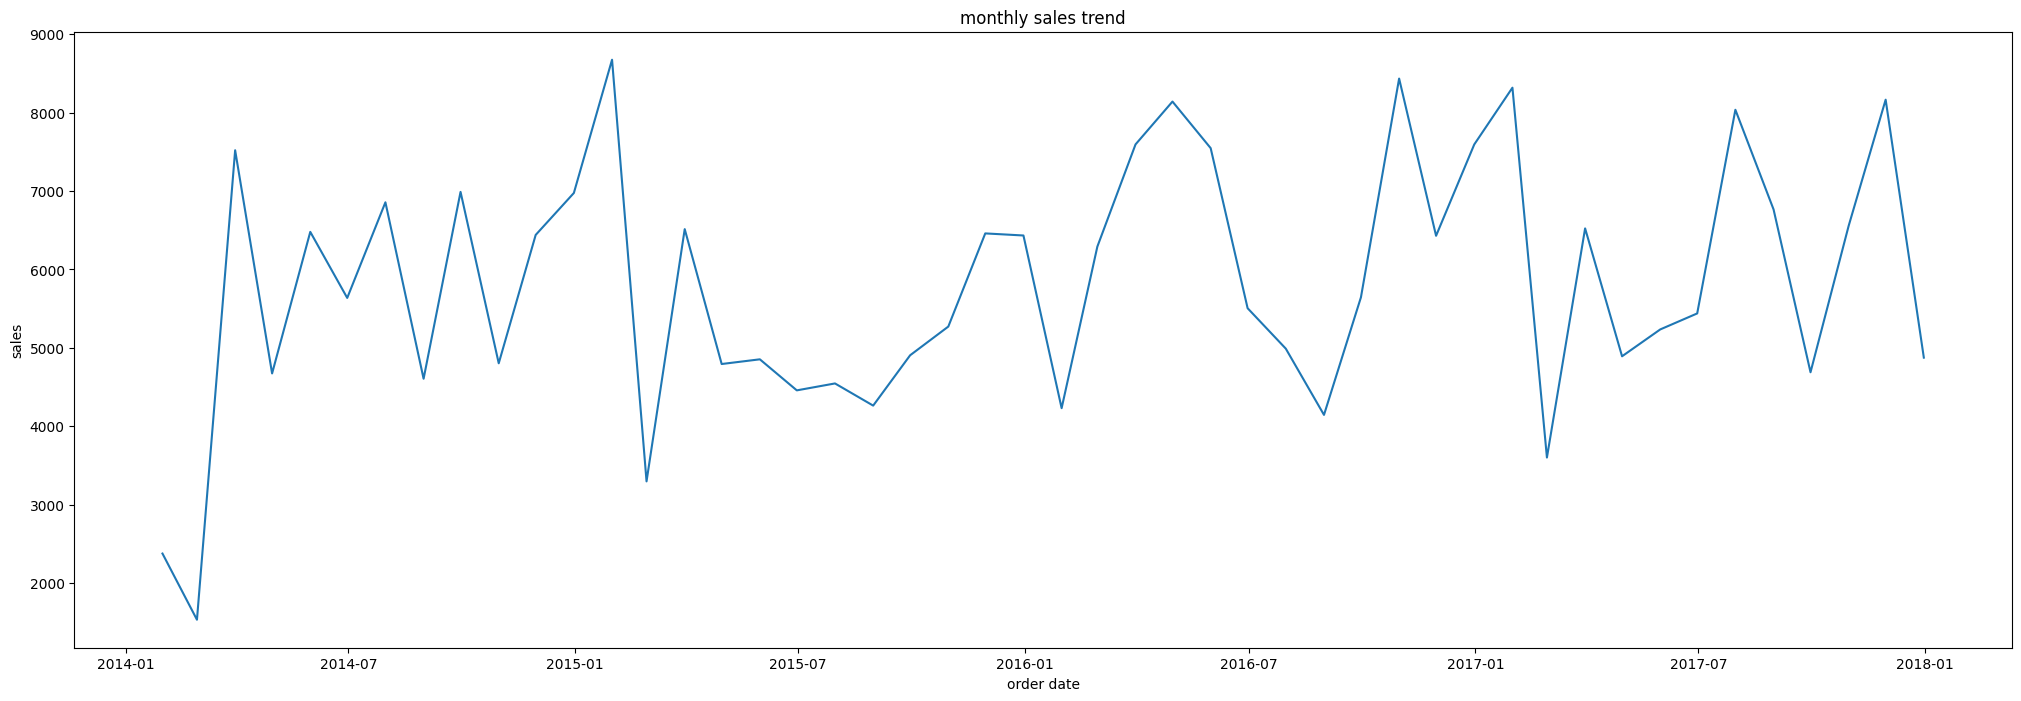

In [34]:
montly_sales=df.groupby("Order Date")
montly_sales=montly_sales['Sales'].mean()
montly_sales=montly_sales.resample("M").sum()
plt.figure(figsize=(25,8))
plt.plot(montly_sales)
plt.xlabel("order date")
plt.ylabel("sales")
plt.title("monthly sales trend")
plt.show();

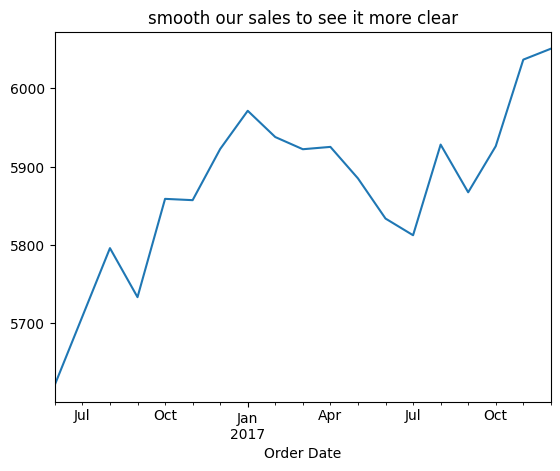

In [35]:
# smooth our sales to see it more clear and see trend 
rolling_mean=montly_sales.rolling(window=30).mean().dropna()
rolling_mean.plot()
plt.title("smooth our sales to see it more clear")
plt.show();

/tmp/ipykernel_18/167495704.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales=yearly_sales.resample("Y").sum()


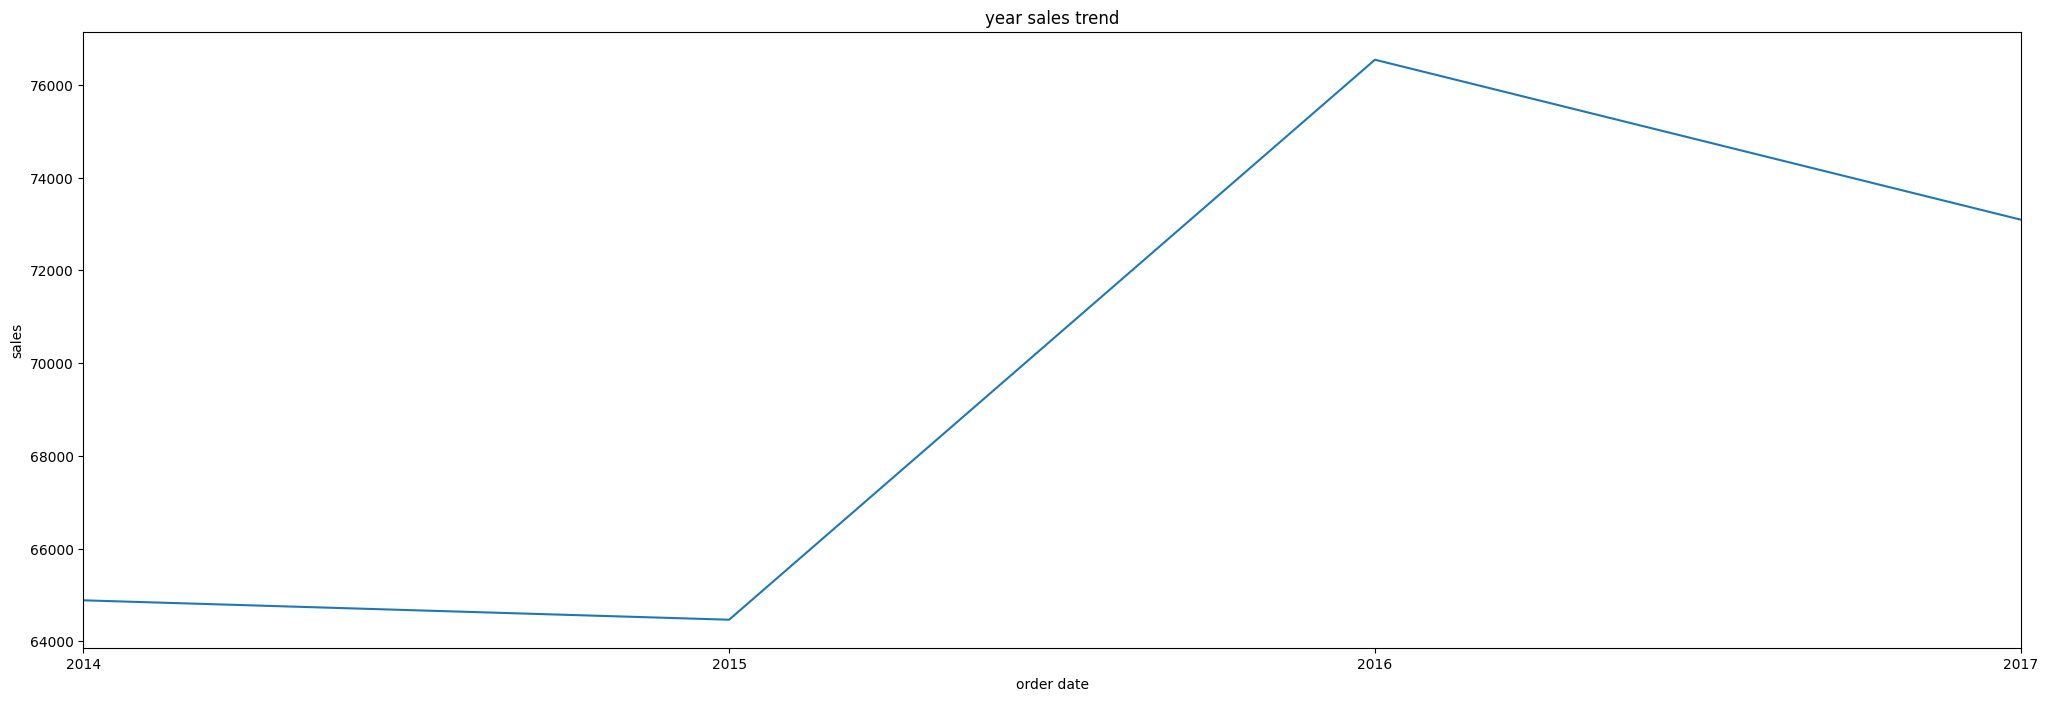

In [36]:
yearly_sales=df.groupby("Order Date")
yearly_sales=yearly_sales['Sales'].mean()
yearly_sales=yearly_sales.resample("Y").sum()
yearly_sales.plot(figsize=(25,8))
plt.xlabel("order date")
plt.ylabel("sales")
plt.title("year sales trend")
plt.show();

/tmp/ipykernel_18/864773163.py:3: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  monthly_sales.resample("M").sum().plot(ax=ax, label='Monthly Sales')
/tmp/ipykernel_18/864773163.py:5: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  monthly_profit.resample("M").sum().plot(ax=ax, label='Monthly Profit')


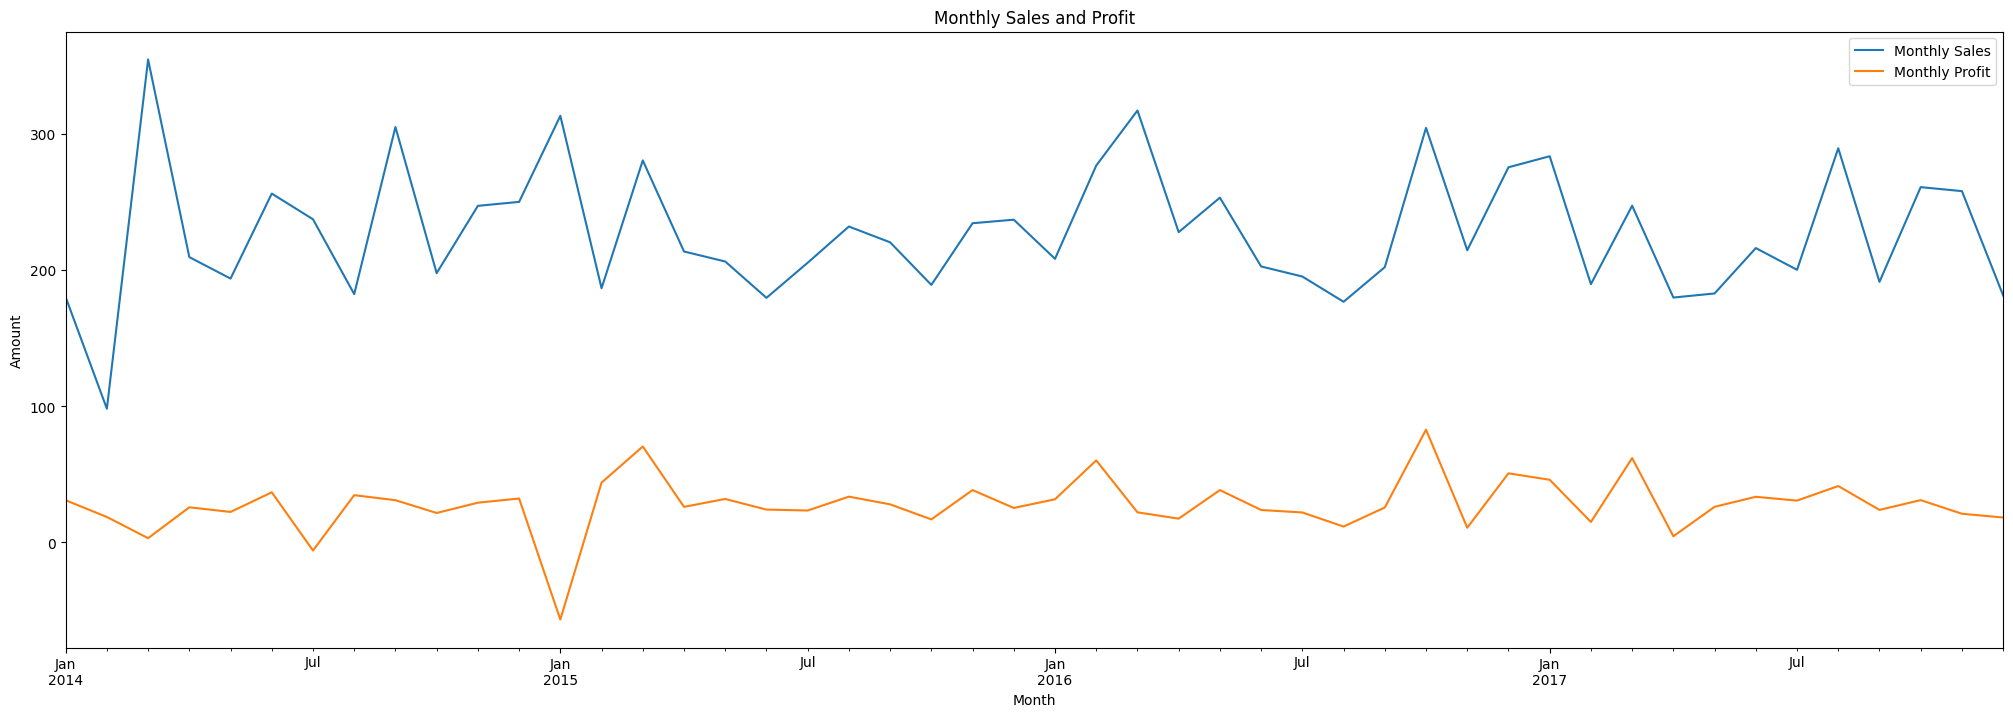

In [37]:
fig, ax = plt.subplots(figsize=(25, 8))
monthly_sales = df.groupby(df["Order Date"].dt.to_period('M'))['Sales'].mean()
monthly_sales.resample("M").sum().plot(ax=ax, label='Monthly Sales')
monthly_profit = df.groupby(df["Order Date"].dt.to_period('M'))['Profit'].mean()
monthly_profit.resample("M").sum().plot(ax=ax, label='Monthly Profit')
ax.set_xlabel('Month')
ax.set_ylabel('Amount')
ax.set_title('Monthly Sales and Profit')
ax.legend()
plt.show()

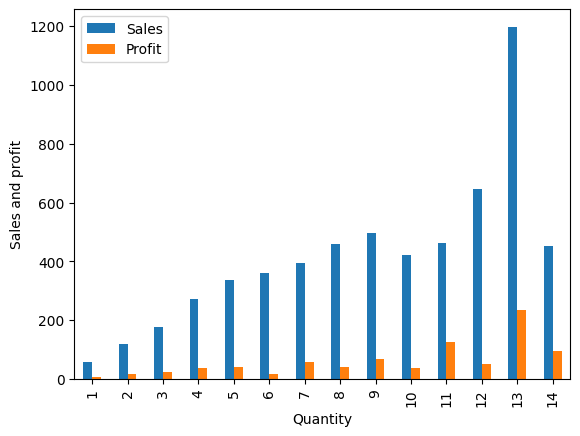

In [38]:
discount_group=df.groupby(['Quantity'])
discount_group=discount_group[['Sales','Profit']].mean()
ax=discount_group.plot(kind="bar")
ax.set_ylabel("Sales and profit")
plt.show();

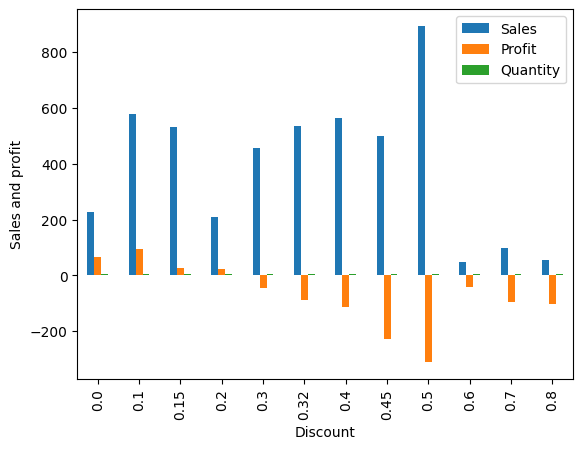

In [39]:
discount_group=df.groupby(['Discount'])
discount_group=discount_group[['Sales','Profit','Quantity']].mean()
ax=discount_group.plot(kind="bar")
ax.set_ylabel("Sales and profit")
plt.show();

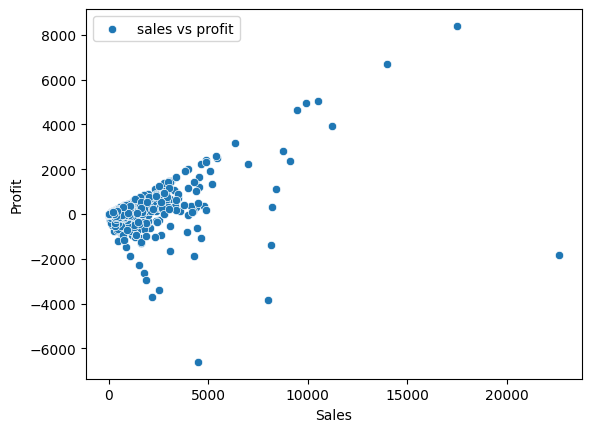

In [40]:
# see corr between Sales , Discount and Profit using scatter plot
sns.scatterplot(x=df['Sales'],y=df['Profit'],label="sales vs profit")
plt.legend()
plt.show();

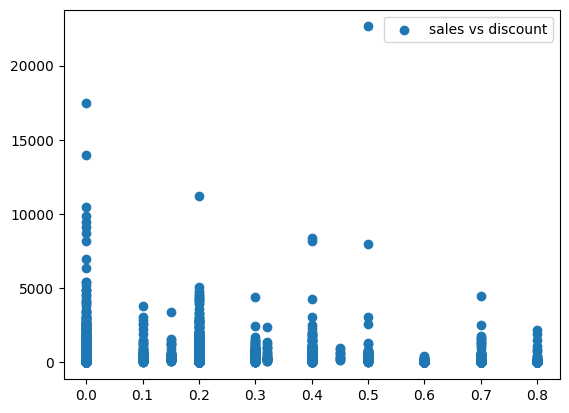

In [41]:
plt.scatter(y=df['Sales'],x=df['Discount'],label="sales vs discount")
plt.legend()
plt.show();

as you see there is many outliers and they are spread 

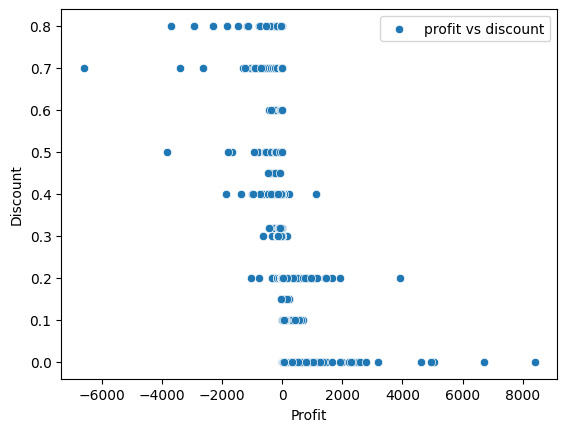

In [42]:
sns.scatterplot(x=df['Profit'],y=df['Discount'],label="profit vs discount")
plt.legend()
plt.show();

In [43]:
pivot_table=df.pivot_table(index="Segment",columns="Ship Mode",values=["Sales","Profit"],aggfunc="sum")

In [44]:
pivot_table

Profit                                               Sales  \
Ship Mode   First Class   Same Day Second Class Standard Class  First Class   
Segment                                                                       
Consumer     21374.0436  9874.2054   24946.9112     77924.0490  159168.9650   
Corporate    14464.4724  1818.1418   18225.7131     57470.8067  105858.4699   
Home Office  13131.3239  4199.4117   14274.0111     28693.9318   86400.9880   

                                                    
Ship Mode     Same Day Second Class Standard Class  
Segment                                             
Consumer     60596.359  231498.9496    710137.0714  
Corporate    45121.323  146126.0388    409040.5351  
Home Office  22645.443   81568.5810    239038.1365

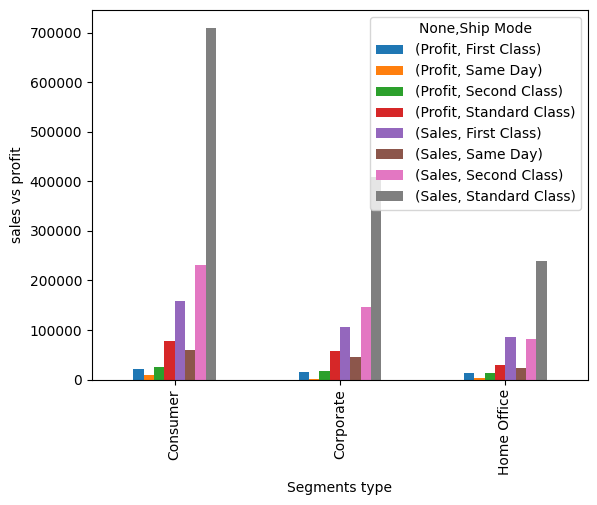

In [45]:
pivot_table.plot(kind="bar",stacked=False)
plt.xlabel("Segments type")
plt.ylabel("sales vs profit");

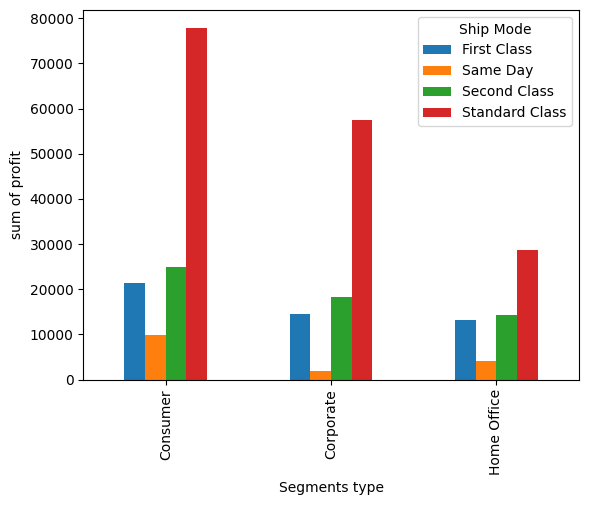

In [46]:
pivot_table=df.pivot_table(index="Segment",columns="Ship Mode",values="Profit",aggfunc="sum")
pivot_table.plot(kind="bar",stacked=False)
plt.xlabel("Segments type")
plt.ylabel("sum of profit");


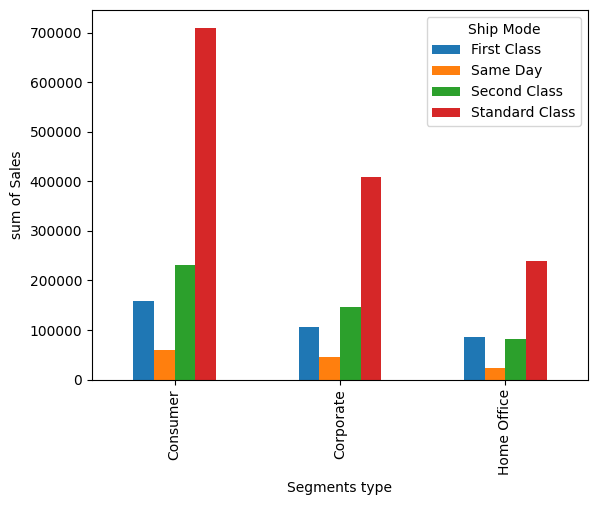

In [47]:
pivot_table=df.pivot_table(index="Segment",columns="Ship Mode",values="Sales",aggfunc="sum")
pivot_table.plot(kind="bar",stacked=False)
plt.xlabel("Segments type")
plt.ylabel("sum of Sales");